In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('weather.csv')
data.head()

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3


In [9]:
# Convert ParameterValue column to numeric, ignoring errors
data['ParameterValue'] = pd.to_numeric(data['ParameterValue'], errors='coerce')
# Drop rows with NaN or non-numeric values
data=data.dropna(subset=['ParameterValue'])
data.head()

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3


In [10]:
avg_values = data.groupby('ParameterName')['ParameterValue'].mean()
avg_values

ParameterName
PA_PT1H_AVG    1012.634146
RH_PT1H_AVG      87.901387
TA_PT1H_AVG       2.740029
TA_PT1H_MAX       2.999857
TA_PT1H_MIN       2.464275
WD_PT1H_AVG     208.793400
WS_PT1H_AVG       3.900717
WS_PT1H_MAX       4.596844
WS_PT1H_MIN       3.260976
Name: ParameterValue, dtype: float64

In [11]:
# Filter the avg_values DataFrame for the specified parameters
rh_avg = avg_values['RH_PT1H_AVG']

#TA_PT1H_AVG    2.740029  TA_PT1H_MAX    2.999857   TA_PT1H_MIN     2.464275
temp_avg = (avg_values['TA_PT1H_AVG']+ avg_values['TA_PT1H_MAX']+ avg_values['TA_PT1H_MIN'])/3

#WS_PT1H_AVG   3.900717   WS_PT1H_MAX    4.596844   WS_PT1H_MIN     3.260976
wind_speed_avg = (avg_values['WS_PT1H_AVG'] + avg_values['WS_PT1H_MAX'] + avg_values['WS_PT1H_MIN'])/3

pressure_avg = avg_values['PA_PT1H_AVG']

# Print the calculated values
print("Relative Humidity:", rh_avg)
print("Temperature Average:", temp_avg)
print("Wind Speed Average:", wind_speed_avg)
print("Pressure Average:", pressure_avg)

Relative Humidity: 87.90138674884437
Temperature Average: 2.734720229555237
Wind Speed Average: 3.9195121951219516
Pressure Average: 1012.6341463414634


In [12]:
# Calculate minimum, maximum, and median values for each parameter
result = data.groupby('ParameterName')['ParameterValue'].agg(['min', 'max', 'median'])

# Find the hour with the highest value for each parameter
max_hour_indices = data.groupby('ParameterName')['ParameterValue'].idxmax()
max_hour_values = data.loc[max_hour_indices, ['Time', 'ParameterName', 'ParameterValue']]

print("Minimum, Maximum, and Median Values:")
print(result)
print("\nHour with the highest value for each parameter:")
print(max_hour_values)

Minimum, Maximum, and Median Values:
                 min     max  median
ParameterName                       
PA_PT1H_AVG    977.3  1032.6  1013.7
RH_PT1H_AVG     61.0   100.0    89.0
TA_PT1H_AVG     -8.4    10.9     2.8
TA_PT1H_MAX     -7.8    11.1     3.0
TA_PT1H_MIN     -9.1    10.9     2.5
WD_PT1H_AVG      4.0   359.0   188.0
WS_PT1H_AVG      0.4    10.3     3.7
WS_PT1H_MAX      0.7    12.3     4.4
WS_PT1H_MIN      0.1     9.5     3.1

Hour with the highest value for each parameter:
                      Time ParameterName  ParameterValue
2818  2020-11-10T18:00:00Z   PA_PT1H_AVG          1032.6
3327  2020-11-12T13:00:00Z   RH_PT1H_AVG           100.0
648   2020-11-03T06:00:00Z   TA_PT1H_AVG            10.9
649   2020-11-03T06:00:00Z   TA_PT1H_MAX            11.1
650   2020-11-03T06:00:00Z   TA_PT1H_MIN            10.9
7615  2020-11-27T10:00:00Z   WD_PT1H_AVG           359.0
436   2020-11-02T12:00:00Z   WS_PT1H_AVG            10.3
461   2020-11-02T14:00:00Z   WS_PT1H_MAX           

In [13]:
import matplotlib.pyplot as plt

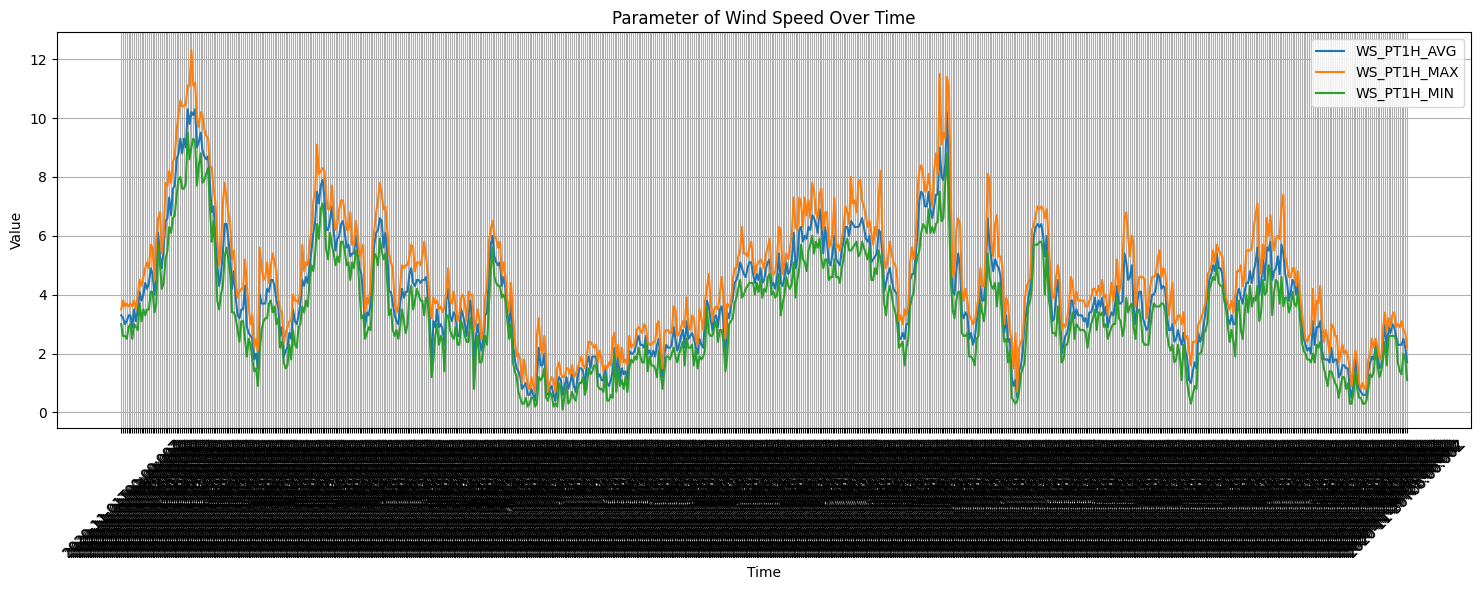

In [14]:
# Filter the DataFrame for the parameters we want to plot
parameters_to_plot_1 = ['WS_PT1H_AVG','WS_PT1H_MAX','WS_PT1H_MIN']

data_plot = data[data['ParameterName'].isin(parameters_to_plot_1)]

# Pivot the DataFrame to have Time as index and ParameterName as columns
data_pivot = data_plot.pivot(index='Time', columns='ParameterName', values='ParameterValue')

# Plot the data
plt.figure(figsize=(15, 6))

for parameter in parameters_to_plot_1:
    plt.plot(data_pivot.index, data_pivot[parameter], label=parameter)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Parameter of Wind Speed Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

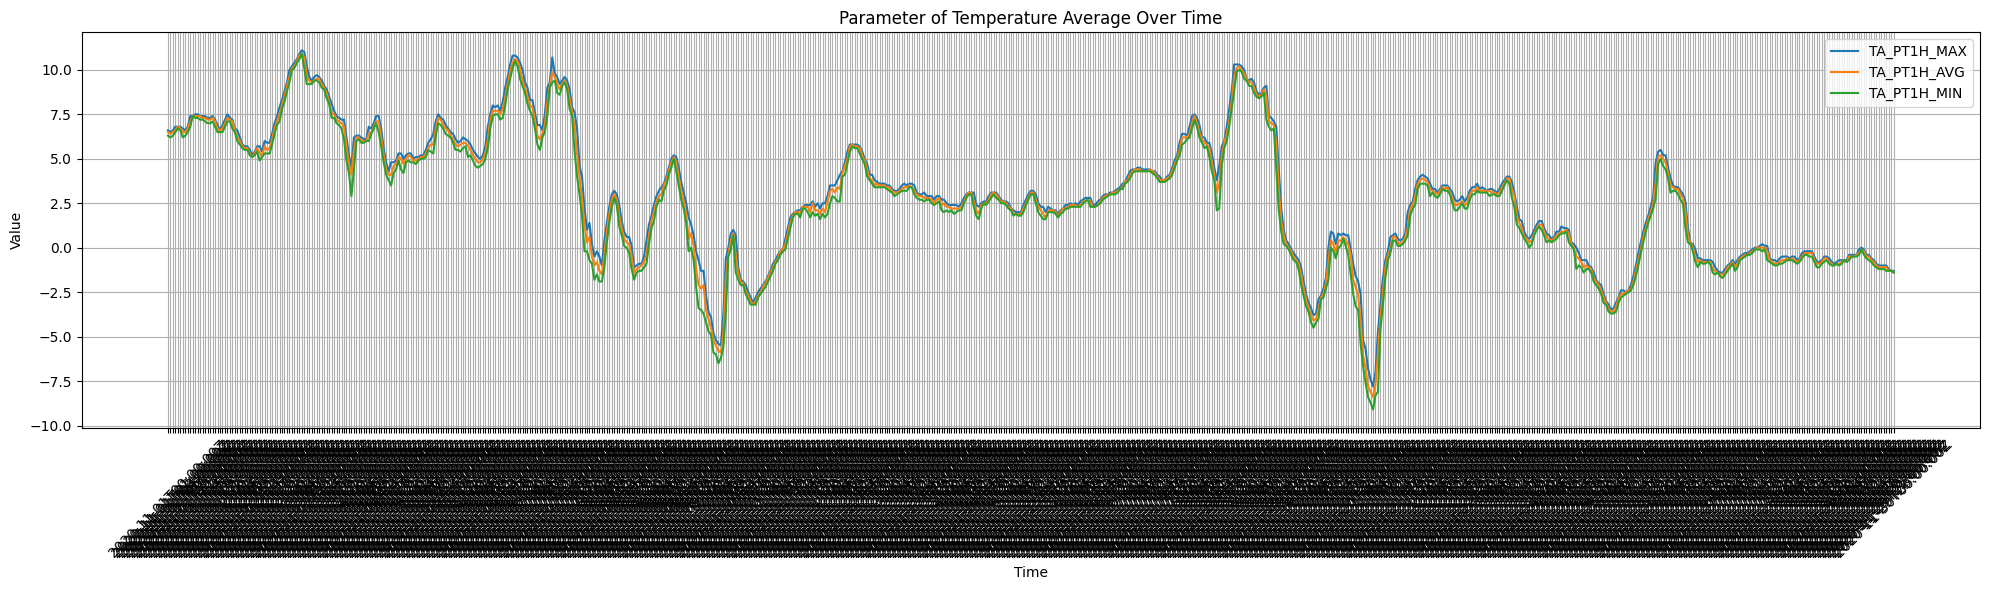

In [15]:
parameters_to_plot_2 = ['TA_PT1H_MAX', 'TA_PT1H_AVG', 'TA_PT1H_MIN']

data_plot = data[data['ParameterName'].isin(parameters_to_plot_2)]

# Pivot the DataFrame to have Time as index and ParameterName as columns
data_pivot = data_plot.pivot(index='Time', columns='ParameterName', values='ParameterValue')

# Plot the data
plt.figure(figsize=(20, 6))

for parameter in parameters_to_plot_2:
    plt.plot(data_pivot.index, data_pivot[parameter], label=parameter)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Parameter of Temperature Average Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

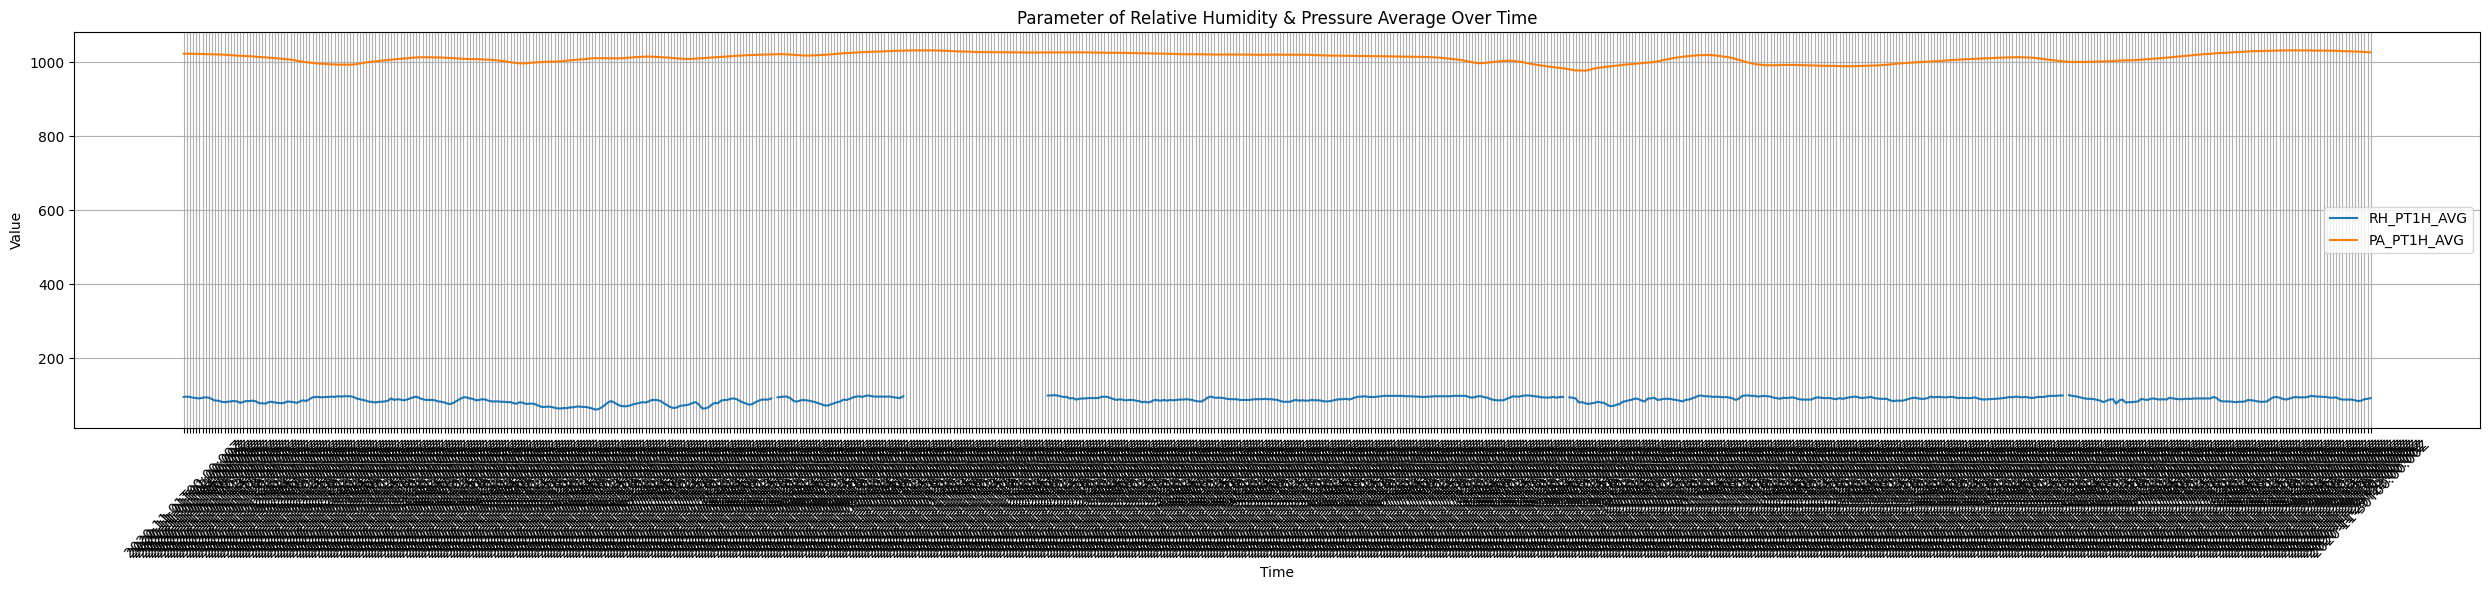

In [16]:
parameters_to_plot_3 = ['RH_PT1H_AVG','PA_PT1H_AVG']


data_plot = data[data['ParameterName'].isin(parameters_to_plot_3)]

# Pivot the DataFrame to have Time as index and ParameterName as columns
data_pivot = data_plot.pivot(index='Time', columns='ParameterName', values='ParameterValue')

# Plot the data
plt.figure(figsize=(25, 6))

for parameter in parameters_to_plot_3:
    plt.plot(data_pivot.index, data_pivot[parameter], label=parameter)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Parameter of Relative Humidity & Pressure Average Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()